In [24]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# โหลดข้อมูล

In [ ]:
stock_symbol = "SCC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")
df2

In [6]:
df2 = df2.drop(df2.index[[0, 1]])
df2.head()

Price,Close,High,Low,Open,Volume
Ticker,SCC.BK,SCC.BK,SCC.BK,SCC.BK,SCC.BK
Date,,,,,
2015-01-07,315.036896,315.036896,310.760377,312.185883,2041500
2015-01-08,319.313477,322.164490,316.462463,317.887970,1209700
2015-01-09,323.589905,323.589905,320.738892,322.164399,545500
2015-01-12,323.589905,326.440917,319.313386,319.313386,904500
2015-01-13,326.440948,327.866455,319.313417,320.738923,1021500


In [8]:
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 Price   Ticker
Close   SCC.BK    0
High    SCC.BK    0
Low     SCC.BK    0
Open    SCC.BK    0
Volume  SCC.BK    0
dtype: int64


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2015-01-07 to 2023-03-10
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, SCC.BK)   1990 non-null   float64
 1   (High, SCC.BK)    1990 non-null   float64
 2   (Low, SCC.BK)     1990 non-null   float64
 3   (Open, SCC.BK)    1990 non-null   float64
 4   (Volume, SCC.BK)  1990 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.3 KB


In [12]:
df2.describe()

Price,Close,High,Low,Open,Volume
Ticker,SCC.BK,SCC.BK,SCC.BK,SCC.BK,SCC.BK
count,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03
mean,356.022600,358.959869,353.339370,356.224009,2.554797e+06
std,32.179773,31.981044,32.344093,32.308069,1.853292e+06
min,227.058563,236.413048,207.499261,221.105770,0.000000e+00
25%,333.359406,336.350819,330.693247,333.181785,1.466200e+06
50%,358.787476,360.849376,355.404951,358.391571,2.131600e+06
75%,382.121056,385.409342,379.601927,382.822768,3.113175e+06
max,427.154785,427.359718,421.166073,425.811260,4.198940e+07


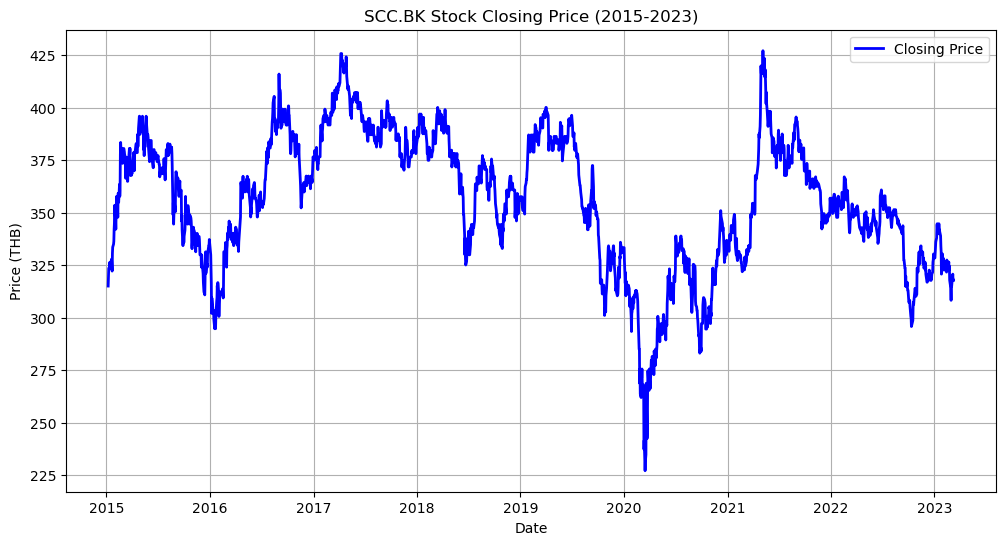

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Close'], label="Closing Price", linewidth=2, color='blue')

# เพิ่ม title และ labels
plt.title("SCC.BK Stock Closing Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error


[*********************100%***********************]  1 of 1 completed
C:\Users\Zbook Firefly 14 G8\anaconda3\envs\shifa\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Zbook Firefly 14 G8\anaconda3\envs\shifa\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


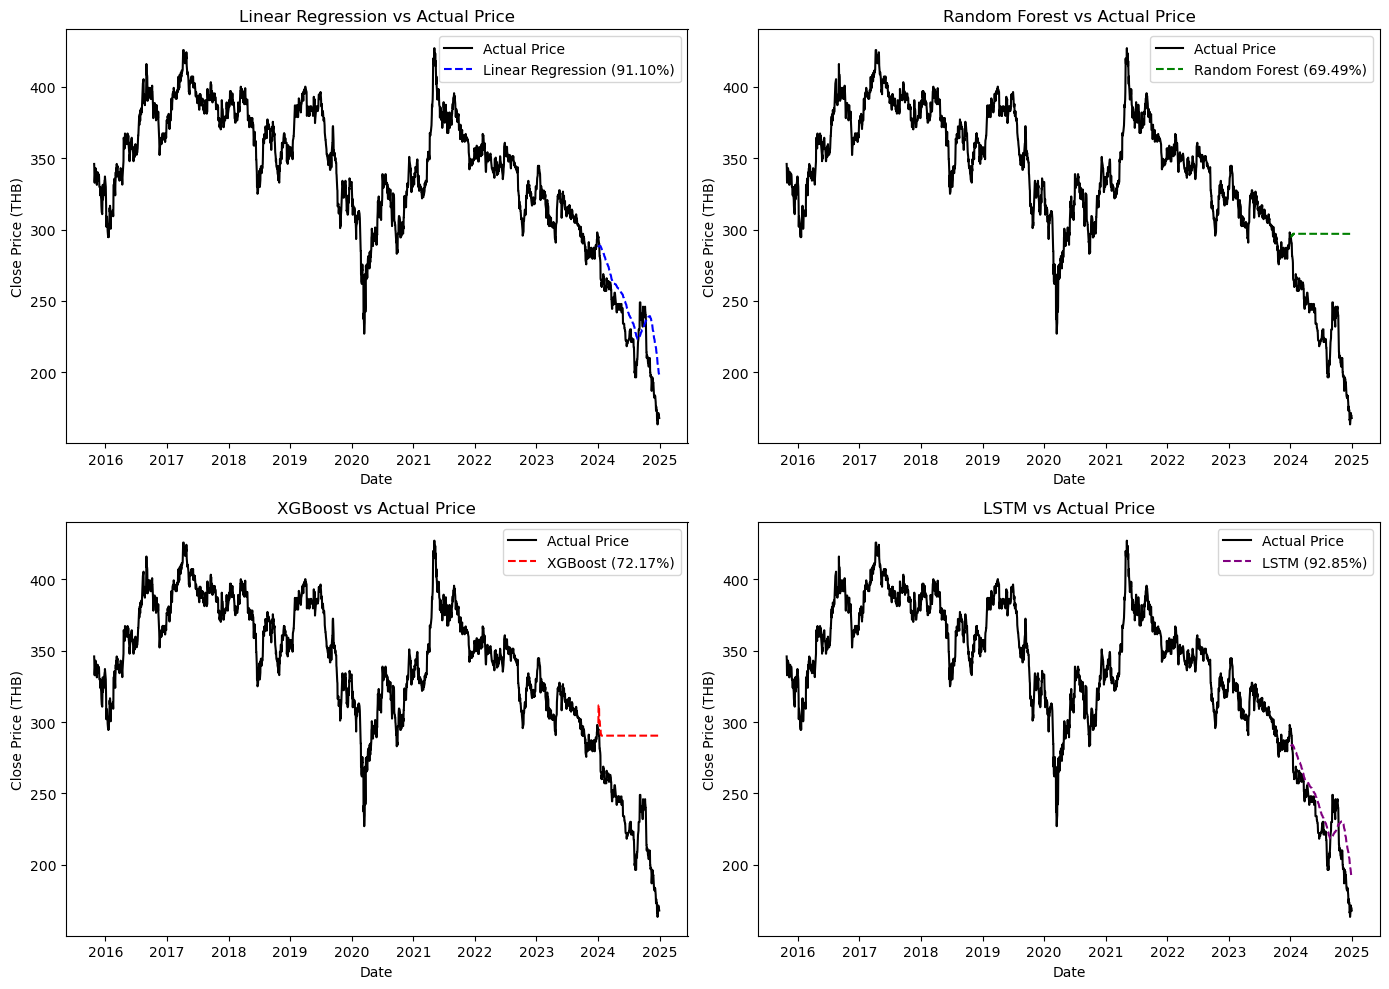

In [36]:
# โหลดข้อมูลหุ้น ADVANC.BK (ถึงปี 2024)
ticker = "SCC.BK"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']  # ใช้ข้อมูลถึงปี 2023 เป็น Train Data
test = data.loc['2024']  # ใช้ปี 2024 เป็น Test Data โดยใช้ .loc เพื่อเลือกปี 2024

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดลเทียบกับข้อมูลจริง ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")



📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 91.10%
Random Forest: 69.49%
XGBoost: 72.17%
LSTM: 92.85%


In [60]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [52]:
# Download stock data
stock_symbol = "SCC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")

# Feature engineering: Create lag features (previous days' closing prices)
for i in range(1, 6):  # Lags for previous 5 days
    df2[f'Close_Lag_{i}'] = df2['Close'].shift(i)

# Drop rows with missing values
df2.dropna(inplace=True)

# Use 'Close' as the target variable and lag features as the input
X = df2[['Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = df2['Close']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (optional, especially important for models like XGBoost)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[*********************100%***********************]  1 of 1 completed


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [58]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae:.2f}")
print(f"Linear Regression MSE: {lr_mse:.2f}")

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")


# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost MSE: {xgb_mse:.2f}")

Linear Regression MAE: 3.30
Linear Regression MSE: 22.62


C:\Users\Zbook Firefly 14 G8\anaconda3\envs\shifa\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MAE: 3.74
Random Forest MSE: 28.38
XGBoost MAE: 3.89
XGBoost MSE: 33.38


In [62]:
# Load your stock data (ADVANC.BK)
stock_symbol = "ADVANC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")

# Feature engineering: Create lag features (previous days' closing prices)
for i in range(1, 6):  # Lags for previous 5 days
    df2[f'Close_Lag_{i}'] = df2['Close'].shift(i)

# Drop rows with missing values
df2.dropna(inplace=True)

# Prepare the feature matrix (X) and target vector (y)
X = df2[['Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = df2['Close']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features for LSTM model (scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (3D array: [samples, time steps, features])
X_train_lstm = np.array(X_train_scaled).reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X_train_lstm, y_train, epochs=20, verbose=1)

# Predict with LSTM model
y_pred_lstm = model.predict(X_test_lstm)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
print(f"MAPE - LSTM: {mape_lstm:.4f}")

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



C:\Users\Zbook Firefly 14 G8\anaconda3\envs\shifa\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 23554.2090
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14318.8330
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 689.4294
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 317.2442
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.9789
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.5910
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8496
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6889
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5912
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9905
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8043
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0572
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2167
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6341
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3507
Epoch 16/20
50